# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 3</span>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit
plt.rcParams.update({
    'font.family':'cmr10',
    'mathtext.fontset': 'cm',
    'axes.formatter.use_mathtext': True,
    'axes.axisbelow': True,
    'figure.figsize': [6.0, 6.0],
    'axes.labelsize': 15,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15,
    'font.size':15
})

### Exercise 03.1 <span style="color:red"> Plain vanilla option pricing </span>

Black-Scholes theory assumes that the time evolution of the asset price is stochastic and exhibits geometric Brownian motion (GBM) with constant risk-free interest rate $r$ and volatility $\sigma$.

Black-Scholes <span style="color:blue"> analytic solution </span> for the price at time t<T:
- European Call-option price:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- European Put-option price:
$$ P\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

where 
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

where $d_2 = d_1 - \sigma\sqrt{T-t}$, and where
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
is the cumulative of Gaussian $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
and where
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$

By using the following parameters: 
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

compute at time $t=0$ **via Monte Carlo** the European call-option price, $C[S(0),0]$, and put-option price, $P[S(0),0]$:

1. By sampling **directly** the final asset price $S(T)$ for a $GBM(r,\sigma^2)$
2. By sampling the discretized $GBM(r,\sigma^2)$ path of the asset price
dividing $[0,T]$ in $10^2$ time intervals: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{100}=T=1)$

Remember that given an asset price $S\sim GBM(\mu,\sigma^2)$, with initial value $S(0)$, then
    $$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$
    where $W(t)\sim\mathcal{N}(0,t)$.
    Moreover, since the increments of $W$ are independent and normally distributed, the simple recursive procedure for sampling discretized values of $S\sim GBM(\mu,\sigma^2)$ at $t_1 < t_2 < … < t_n$ is:
$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
with $Z_i \sim \mathcal{N}(0,1)$


Make four pictures for the estimation of the European call-option prices, $C[S(0),0]$ (direct and discretized), and put-option prices, $P[S(0),0]$ (direct and discretized), with their uncertainties with a large number of asset prices at time $t=T$, say $M\ge 10^4$, as a function of the number of blocks, $N$ As usual, in computing statistical uncertainties, use data blocking.

##### Soluzione
Valutiamo il prezzo finale $S(T)$ delle opzioni europee Pull e Call dopo un certo tempo $t = T$ in due modi differenti: 
- campionando direttamnete il prezzo finale
- discretizzando il campionamento dividendo l'intervallo di tempo in sub-intervalli

In entrambi i casi assumiamo che l'evoluzione del prezzo sia descritto da un _Moto Browniano Geometrico_ (GBM).

Nel caso del campionamento diretto abbiamo che:
 $$S(T)=S(0) exp [ (r − \frac{1}{2} \sigma^2)Y+\sigma W(T)]$$

dove $W(T)$ è un numero estratto casualmente con il metodo $rnd.Gauss(\mu, T)$, dove $\mu$ rappresenta il centro della gaussiana e $T$ la larghezza della gaussiana

``` c++
//direct sampling
double GBM(double S_0, double t, double r, double sigma, double Wt) {
    return S_0 * exp((r- (0.5*pow(sigma,2)))*t + (sigma*Wt));
};
```

Nel caso del capionamento discreto dividiamo l'intervallo di tempo $[0, T]$ in $10^2$ intervalli e otteniamo il valore del prezzo da ogni tempo successivo con la formula:
$$ S(t_{i+1}) = S(t_i) \exp[(\mu - \frac{1}{2} \sigma^2 )(t_{i+1}-t_i) + \sigma Z_{i+1} \sqrt{t_{i+1}-t_i}]  $$ 

dove $Z_{i+1}$ sono numeri casuali che seguono una distribuzione gaussiana.

``` c++
//discrete sampling
double GBM_discrete(double S_t1, double t1, double t2, double r, double sigma, double Z) {
    return S_t1 * exp((r- (0.5*pow(sigma,2)))*(t2-t1)+ (sigma*Z*sqrt(t2-t1)));
};
```

Dopo aver eseguito il moto browniano geometrico calcoliamo il guadagno sia nella Call che nella Put come:
$$ C = e^{-rT}max(0, S(T)-K)$$

$$ P = e^{-rT}max(K - S(T), 0)$$

Ripetiamo questo calcolo M volte e dividiamo i risultati ottenuti in blocchi per eseguire il data blocking e otteniamo i grafici seguenti, sia per la call che per la put con entrambi i metodidi campionamento.

Confrontiamo i risultati ottenuti con i risultati analitici della teoria di Black-Scholes riportata in appendice.

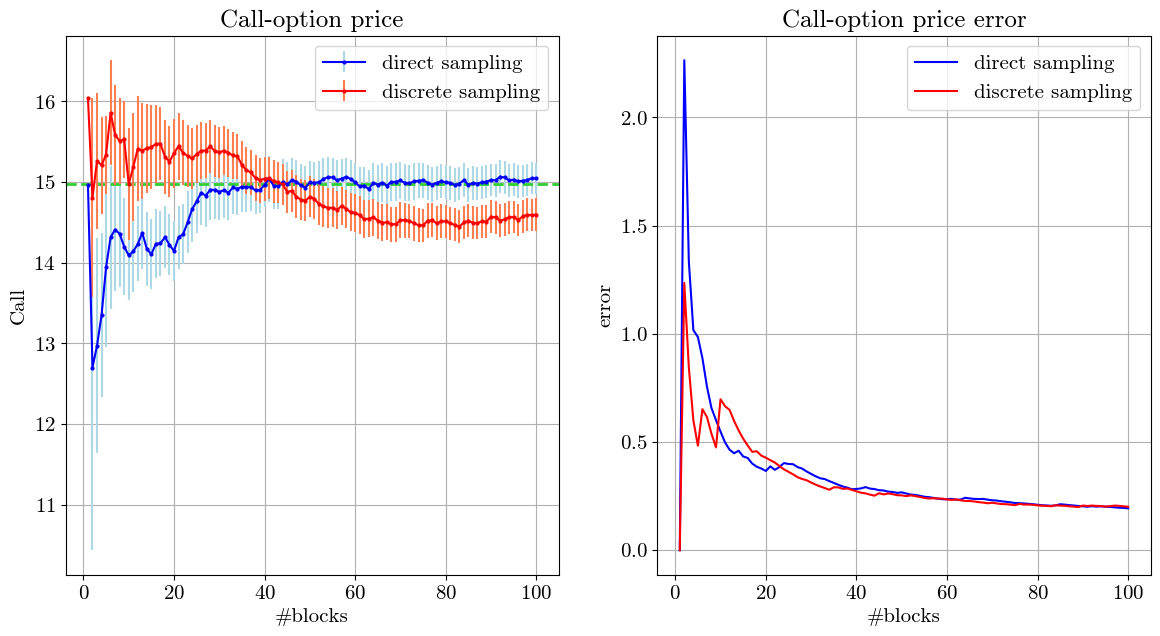

In [8]:
#call
Call = np.loadtxt("Call.dat")
x = Call[:,0]
y = Call[:,1]
err = Call[:,2]

plt.figure(1, figsize=(14,7))
plt.subplot(1,2,1)
plt.errorbar(x,y,err,ecolor= 'lightblue', marker = 'o', markersize = 2, color='blue', label = 'direct sampling')
plt.axhline(y=14.975790778311286, color='limegreen', linestyle='--', linewidth=2)
plt.xlabel('#blocks')
plt.ylabel('Call')
plt.grid(True)

Call_d = np.loadtxt("Call_d.dat")
x_d = Call_d[:,0]
y_d = Call_d[:,1]
err_d = Call_d[:,2]

plt.figure(1)
plt.subplot(1,2,1)
plt.errorbar(x_d,y_d,err_d, ecolor= 'coral',marker = 'o', markersize = 2, color='red', label = 'discrete sampling')
#plt.axhline(y=14.975790778311286, color='firebrick', linestyle='-', linewidth=2)
plt.title("Call-option price")
plt.grid(True)
plt.legend()

plt.figure(1)
plt.subplot(1,2,2)
plt.plot(x, err, color = 'blue', label = 'direct sampling')
plt.plot(x_d, err_d, color = 'red', label = 'discrete sampling')

plt.grid()
plt.xlabel('#blocks')
plt.ylabel('error')
plt.title("Call-option price error")


plt.legend()


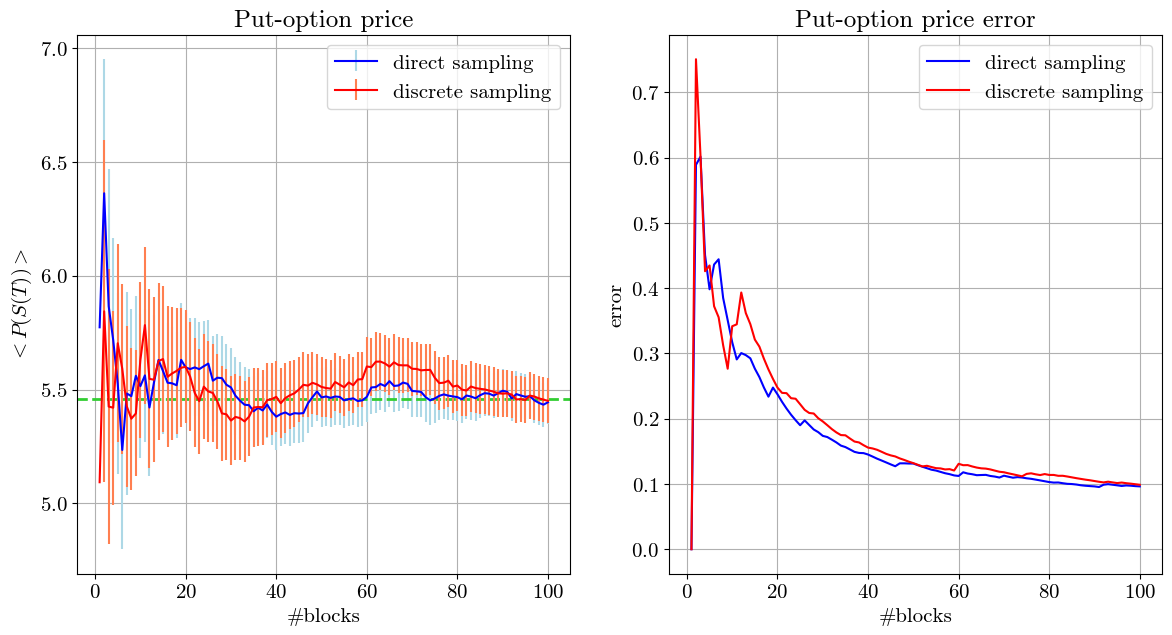

In [9]:
#put
Put = np.loadtxt("Put.dat")
x_P = Put[:,0]
y_P = Put[:,1]
err_P = Put[:,2]

plt.figure(1, figsize=(14,7))
plt.subplot(1,2,1)
plt.errorbar(x_P,y_P,err_P, ecolor= 'lightblue' ,color='blue', label = 'direct sampling')
plt.axhline(y=5.4595325819072364, color='limegreen', linestyle='--', linewidth = 2)
plt.xlabel('#blocks')
plt.ylabel('$<P(S(T))>$')
plt.grid(True)


Put_d = np.loadtxt("Put_d.dat")
x_P_d = Put_d[:,0]
y_P_d = Put_d[:,1]
err_P_d = Put_d[:,2]

plt.figure(1)
plt.subplot(1,2,1)
plt.errorbar(x_P_d,y_P_d,err_P_d, ecolor= 'coral' ,color='red', label = 'discrete sampling')

plt.grid(True)
plt.title("Put-option price")
plt.legend()

plt.figure(1)
plt.subplot(1,2,2)
plt.plot(x_P, err_P, color = 'blue', label = 'direct sampling')
plt.plot(x_P_d, err_P_d, color = 'red', label = 'discrete sampling')
plt.title("Put-option price error")
plt.xlabel('#blocks')
plt.ylabel('error')
plt.grid()

plt.legend()


### Appendice, soluzione analitica di Black-Scholes:

In [5]:
import scipy
from scipy.special import erf
import numpy
from numpy import exp
from numpy.lib.scimath import log, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364
